<a href="https://colab.research.google.com/github/GuiXu40/deeplearning0/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_biclusters
from numpy.random import randn, seed

## 分布函数：
k-means 算法的分布函数

$$J(\boldsymbol{\mu})=\sum_{n=1}^{N} \sum_{k_{1}}^{K} r_{n k}\left\|\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right\|^{2} \tag{1}$$

$\mu_k$:表示聚类中心。
$r_{nk}$:表示第n个样本是否属于k类。

通过下面的EM步骤来最小化(1)：
+ **E-Step**: $\{\mu_k\}_k$固定，计算$\{r_{nk}\}_{n,k}$

$$r_{n \hat{k}}=\left\{\begin{array}{ll}
1 & \hat{k}=\arg \min _{k}\left\|\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right\|^{2} \\
0 & \text { otherwise }
\end{array}\right. \tag{2}$$

+ **M-Step** $\{r_{nk}\}_{n,k}$固定，更新$\{\mu_k\}_k$ 
$$\mu_{\hat{k}}=\frac{1}{N_{\hat{k}}} \sum_{\left\{n \mid \mathbf{x}_{n} \in C_{\hat{k}}\right\}} \mathbf{x}_{n} \tag{3}$$



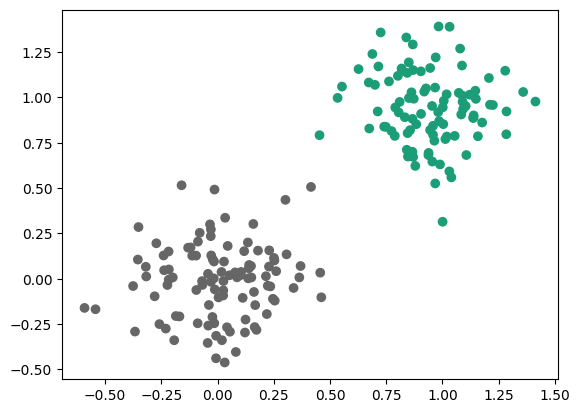

In [2]:
X, y, _ = make_biclusters((200, 2), 2, noise=0.2, random_state=314, minval=0, maxval=1)
plt.scatter(*X.T, c=y.argmax(axis=0), cmap="Dark2")

In [3]:
class KMeans:
    def __init__(self, X, y, K, prototype_init=None, random_state=None):
        seed(random_state)
        self.N, self.M = X.shape
        self.K =K
        self.X = X
        self.y = y
        self.prototypes = self._initialize_protypes(prototype_init, random_state)
        self.i = 0
        self.distortion_hist = [self.compute_distortion()]
    
    def _initialize_protypes(self, prototype, random_state):
        if prototype is None:
            seed(random_state)
            return np.random.randn(self.K, self.M)
        else:
            return prototype
    
    def compute_distances(self):
        """
        计算样本与聚类中心的距离
        """
        distance = (self.X[np.newaxis, ...] - self.prototypes[:, np.newaxis]) ** 2
        return distance
        
    def e_step(self):
        R = self.compute_distances()
        R = R.sum(axis=-1)
        R = R.argmin(axis=0)
        
        r = np.ones((self.N, self.K)).cumsum(axis=1) - 1 == R[:, np.newaxis]
        return r
        
    def m_step(self):
        r = self.e_step()
        prototypes = (self.X[:, np.newaxis] * r[..., np.newaxis]).mean(axis=0)
        return prototypes
    
    def update_prototypes(self):
        self.prototypes = self.m_step()
        Ji = self.compute_distortion()
        self.distortion_hist.append(Ji)
    
    def compute_distortion(self):
        J = self.compute_distances()
        r = self.e_step()
        return (J.sum(axis=-1).T * r).sum()
    
    def fit(self, threshold=1e-6, save_proto_hist=False):
        diff = np.inf
        if save_proto_hist:
            proto_hist =[self.prototypes]
            
        while diff > threshold:
            self.update_prototypes()            
            *_, J0, J1 = self.distortion_hist
            diff = np.abs(J1 / J0 - 1)
            if save_proto_hist:
                proto_hist.append(self.prototypes)
        
        if save_proto_hist:
            return proto_hist
        

In [4]:
mu_0 = np.array([
    [-1, -1],
    [1.5, 1.5]
])

km = KMeans(X, y, 2, prototype_init=mu_0)

hist = km.fit(save_proto_hist=True)

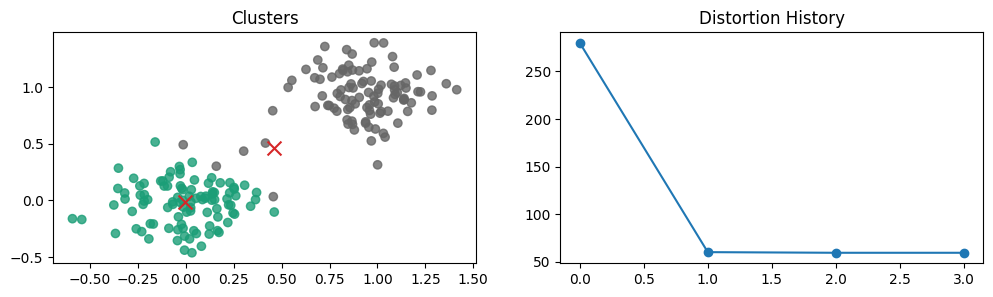

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

R = km.e_step().argmax(axis=1)
ax[1].plot(km.distortion_hist, marker="o")
ax[0].scatter(*X.T, c=R, cmap="Dark2", alpha=0.8)
ax[0].scatter(*km.prototypes.T, c="tab:red", s=100, marker="x");

ax[0].set_title("Clusters");
ax[1].set_title("Distortion History");

In [6]:
R

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1])